Columns: ['review_id', 'customer_name', 'raw_review', 'product', 'rating', 'date', 'cleaned_review', 'review_length']
First few rows:
    review_id   customer_name  \
0          1  Craig Mckenzie   
1          2   Brian Coleman   
2          3    Jeremy Price   
3          4       Jose Roth   
4          5      Allen Sims   

                                          raw_review     product  rating  \
0  Little understand try sell citizen create no m...     Toaster       3   
1                                Hair emplo\(yee on.  Smartwatch       3   
2                      Five p~{}#layer rest himself.  Smartwatch       4   
3  Off try shake care health nation identify mode...  Phone Case       5   
4  New m~,(!🗑@!:~y sport management outside cente...  Headphones       3   

         date  cleaned_review  review_length  
0  2025-05-31             NaN            NaN  
1  2025-06-02             NaN            NaN  
2  2025-05-01             NaN            NaN  
3  2025-05-17             N

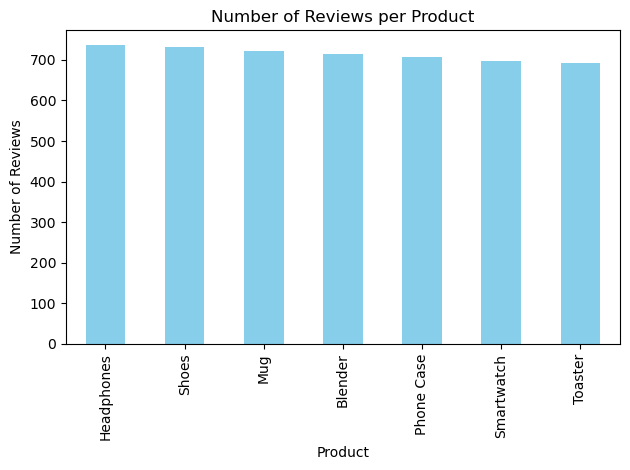

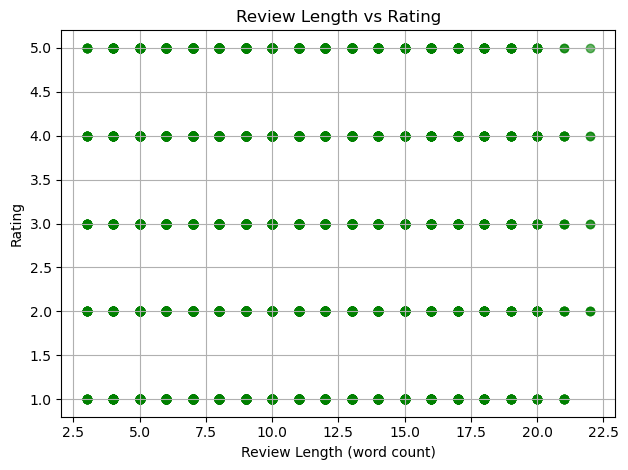

In [1]:
#  Step 1: Import libraries
import pandas as pd
import re
import matplotlib.pyplot as plt

#  Step 2: Load data
df = pd.read_csv("week5_customer_reviews.csv")  # Replace with your actual file name

#  Step 3: View basic info
print("Columns:", df.columns.tolist())
print("First few rows:\n", df.head())

#  Step 4: Clean raw_review
def clean_text(text):
    text = str(text)
    text = re.sub(r"[^\w\s]", " ", text)  # Remove special characters
    text = re.sub(r"\d+", " ", text)      # Remove digits
    text = re.sub(r"\s+", " ", text)      # Remove extra spaces
    return text.strip().lower()           # Trim and lowercase

df["cleaned_review"] = df["raw_review"].apply(clean_text)

#  Step 5: Create review_length column (number of words)
df["review_length"] = df["cleaned_review"].apply(lambda x: len(x.split()))

#  Step 6: Create sentiment column based on rating
def classify_sentiment(rating):
    if rating <= 2:
        return "Negative"
    elif rating == 3:
        return "Neutral"
    else:
        return "Positive"

df["sentiment"] = df["rating"].apply(classify_sentiment)

#  Step 7: Product with most negative reviews (rating ≤ 2)
most_negative_product = df[df["rating"] <= 2]["product"].value_counts().idxmax()
print("\n📌 Product with most negative reviews:", most_negative_product)

#  Step 8: Summary stats – average review length
avg_lengths = df.groupby("sentiment")["review_length"].mean()
print("\n📈 Average Review Lengths by Sentiment:\n", avg_lengths)

#  Step 9: Bar chart – number of reviews per product
product_counts = df["product"].value_counts()
product_counts.plot(kind='bar', title='Number of Reviews per Product', color='skyblue')
plt.xlabel("Product")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()

#  Step 10: Line/Scatter – Relationship between review length and rating
plt.scatter(df["review_length"], df["rating"], alpha=0.6, color='green')
plt.title("Review Length vs Rating")
plt.xlabel("Review Length (word count)")
plt.ylabel("Rating")
plt.grid(True)
plt.tight_layout()
plt.show()
